# Lecture: Building a Module with Good, Documented Functions.  

In [ ]:
import numpy as np 
from numpy import random 
import sounddevice as sd
import warnings #This is a new module you have not seen before 
from matplotlib import pyplot as plt
rng = random.default_rng(seed = 1111)

In [ ]:
def pop_scales():
    ''' pop_scales()
        This function returns a dictionary containing the major scale in the 1st octave 
        returns:     notes           '''
    notes = dict()
    notes = {'A':440,'Bb':466,'B':494,'C':523,'C#':554,'D':587,'Eb':622,'F':659,'F#':698,'G':740,'Ab':831}
    notes['names'] = list(notes.keys())
    notes['frequencies'] = list(notes.values())
    return notes

- Always test your code 

In [ ]:
notes = pop_scales()
print(notes.keys())
print(notes['Bb'])

dict_keys(['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'F', 'F#', 'G', 'Ab', 'names', 'frequencies'])
466


In [ ]:
def make_tone(frequency,duration,samplingrate=44100):
    ''' make_tone returns a pure tone 
        args:       frequency - frequency of the tone in hz
                    duration - duration of the tone in seconds 
        optional:   samplingrate - samplingrate in units of hz
                    default is 44100 
        returns:    tone   '''
    time = np.linspace(0, duration, int(duration*samplingrate)) 
    # The number of samples is the length of time X sampling rate. 
    tone = np.sin(frequency * time  * 2 * np.pi)
    return tone  


- Test code 

In [ ]:
frequency = notes['F#']
duration = 1
tone = make_tone(frequency,duration) 


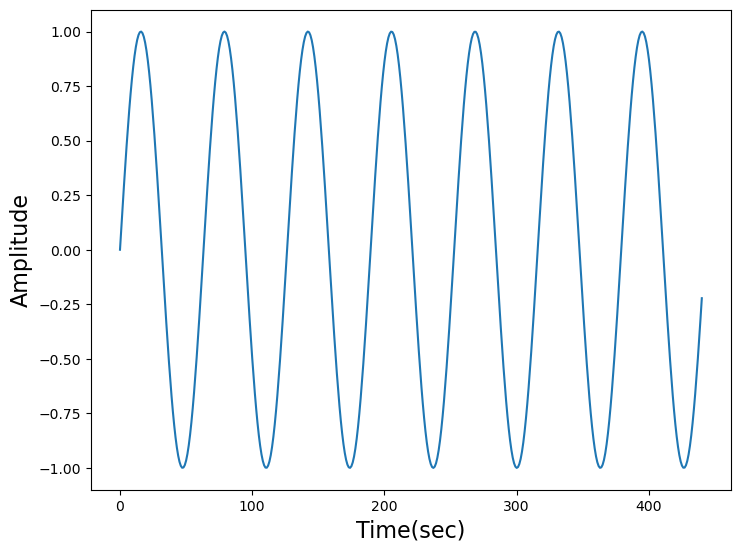

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(tone[0:441])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

In [166]:
def play_sound(sample,volume = 0.05,samplingrate = 44100,block = True):
    ''' play_sound will apply a volume to a sound sample, and send it to the sound card to play
        warning: for safety reasons, this function limits output to 0.25 of the sound card range. 
        args:       sample -    numpy array to be played by the sound card
        optional:   volume -    in range 0 to 0.25 to scale the sound, default to 0.05. 
                                in case of volume > 0.25, returns to default value
                    samplingrate = sampling rate in hz, defaults to 44100
                    block = True or False. flag to block card while sound plays, default is True'''
    if volume > 0.25:
        warnings.warn('volume cannot be larger than 0.25, reset to 0.05')
        volume = 0.05
    sample  = volume*sample/np.max(np.abs(sample)) # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME!   
    sample = 32768*sample # scale to the range of the sound card.
    sample  = sample.astype(np.int16) # convert to 16 bit integers. 
    sd.play(sample, samplingrate, blocking=block) 


In [168]:
frequency = notes['Bb']
duration = 0.4
tone = make_tone(frequency,duration)
play_sound(tone) 

In [169]:
frequency = notes['Bb']
duration = 0.4
tone = make_tone(frequency,duration)
play_sound(tone, volume = 0.2) 

In [170]:
frequency = notes['Ab']
duration = 0.4
tone = make_tone(frequency,duration)
play_sound(tone, volume = 0.3)

/tmp/ipykernel_4567/3702811805.py:10: UserWarning: volume cannot be larger than 0.25, reset to 0.05
  warnings.warn('volume cannot be larger than 0.25, reset to 0.05')
